In [3]:
import codecs
import  matplotlib.pyplot as plt
import re
from config import *

In [34]:
model = ['DistMult', '50', '0.0001', 'wn', 'Adam']

In [45]:
file_path = 'checkpoint/{}.emb_{}.lr_{}.data_{}.optim_{}.check.txt'.format(model[0], model[1], model[2], model[3], model[4])

In [46]:
datasets_param.d['FB15k']

{'root': 'data/FB15k',
 'name_list': ['freebase_mtr100_mte100-test.txt',
  'freebase_mtr100_mte100-train.txt',
  'freebase_mtr100_mte100-valid.txt'],
 'ent_tot': 14951,
 'rel_tot': 1345,
 'train_tot': 483142,
 'test_tot': 59071,
 'valid_tot': 50000}

In [47]:


fr = codecs.open(file_path, 'r', encoding='utf-8')
v_loss = []
t_loss = []
for line in fr.readlines():
    p = re.match(r'epoch:([\.0-9]+), valid loss:([\.0-9]+), train loss:([\.0-9]+), timestep:([\.0-9]+)', line)
    if 'FB15k' in file_path:
        v_loss.append(float(p.group(2)) / datasets_param.d['FB15k']['valid_tot'])
        t_loss.append(float(p.group(3)) / datasets_param.d['FB15k']['train_tot'])
    elif 'wn' in file_path:
        v_loss.append(float(p.group(2)) / datasets_param.d['wn']['valid_tot'])
        t_loss.append(float(p.group(3)) / datasets_param.d['wn']['train_tot'])

In [48]:

len(v_loss)

1000

In [49]:
x_ = range(1, 1001)
len(x_)

1000

In [52]:
x_t = x_[:50]
v_loss_t = v_loss[:50]
t_loss_t = t_loss[:50]

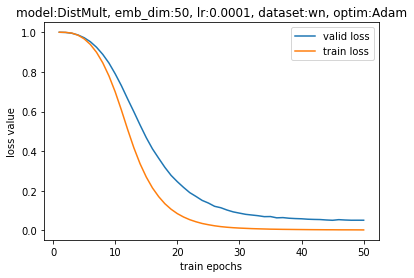

In [53]:
plt.plot(x_t, v_loss_t, label='valid loss')
plt.plot(x_t, t_loss_t, label='train loss')
plt.title('model:{}, emb_dim:{}, lr:{}, dataset:{}, optim:{}'.format(model[0], model[1], model[2], model[3], model[4]))
plt.xlabel('train epochs')
plt.ylabel('loss value')
plt.legend()
plt.show()